# HW3 Q1

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
tf.__version__

'1.15.0'

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
len(data.train.images) # Train image count

55000

In [0]:
len(data.test.images) # Test image count

10000

### Data dimensions

In [0]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of classes, one class for each of 10 digits.
num_classes = 10

### Placeholder variables

In [0]:
x = tf.placeholder(tf.float32, [None, img_size_flat])
#x_1 = tf.placeholder(tf.float32, [None, img_size_flat])

In [0]:
output_true = tf.placeholder(tf.float32, [None, img_size_flat])
# = tf.placeholder(tf.float32, [None, img_size_flat])

In [0]:
#y_true_cls = tf.placeholder(tf.int64, [None])

### Variables to be optimized

### Model

In [0]:
layer1 = tf.layers.dense(x, 32, activation= 'relu')
output_layer= tf.layers.dense(layer1, 784, activation= 'sigmoid')

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


### Cost-function to be optimized

In [0]:
#cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                        #labels=y_true)
meansq = tf.reduce_mean(tf.square(output_layer - output_true))

### Optimization method

In [0]:
learning_rate = 0.5
optimizer = tf.train.AdagradOptimizer(learning_rate= learning_rate).minimize(meansq)
#optimizer = tf.train.AdamOptimizer(0.0003).minimize(meansq)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Performance measures

## TensorFlow Run

In [0]:
session = tf.Session()

In [0]:
session.run(tf.global_variables_initializer())

### Train

In [0]:
def train(batch_size):
    train_loss = []
    for i in range(int(len(data.train.images) / batch_size)):
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {x: x_batch,
                           output_true: x_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        _, loss = session.run([optimizer, meansq], feed_dict=feed_dict_train)
        train_loss.append(loss)
    print("Training loss is :", loss)
    return np.mean(train_loss)
        #accuracy_array.append(accuracy)
    #return accuracy_array

TRAIN THE MODEL

Training loss is : 0.062178582
Test loss at epoch : 0 is :  0.064678416
Training loss is : 0.05072531
Test loss at epoch : 1 is :  0.05100965
Training loss is : 0.046603486
Test loss at epoch : 2 is :  0.044041954
Training loss is : 0.040438514
Test loss at epoch : 3 is :  0.039601948
Training loss is : 0.035036333
Test loss at epoch : 4 is :  0.03637999
Training loss is : 0.03358168
Test loss at epoch : 5 is :  0.0336573
Training loss is : 0.03140374
Test loss at epoch : 6 is :  0.03126972
Training loss is : 0.02830113
Test loss at epoch : 7 is :  0.029231472
Training loss is : 0.030176697
Test loss at epoch : 8 is :  0.027570847
Training loss is : 0.026907722
Test loss at epoch : 9 is :  0.026130246
Training loss is : 0.02590359
Test loss at epoch : 10 is :  0.024923231
Training loss is : 0.02516983
Test loss at epoch : 11 is :  0.023826946
Training loss is : 0.023566203
Test loss at epoch : 12 is :  0.02287191
Training loss is : 0.022158043
Test loss at epoch : 13 is :  0.02193887
T

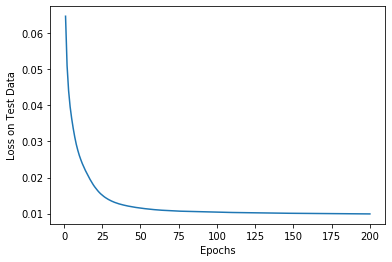

Final Train Loss is :  0.010267617


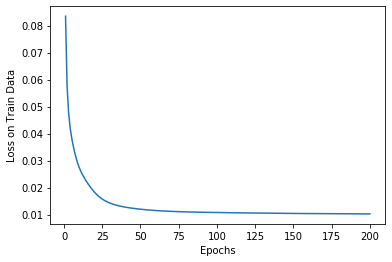

In [0]:

test_loss_array = []
train_loss_array = []
epochs = 200
for k in range(epochs) :
  if k > 70:
    learning_rate = 0.3
  elif k > 200:
    learning_rate = 0.1
  loss = train(batch_size = 100)
  train_loss_array.append(loss)

  feed_dict_test = {x: data.test.images,
                  output_true: data.test.images}
      # Run the model for test data
  _, loss = session.run([optimizer, meansq], feed_dict=feed_dict_test)
  print("Test loss at epoch :", k, "is : ", loss)
  test_loss_array.append(loss)
  
a = np.linspace (1,epochs,epochs)

plt.plot(a,test_loss_array)
plt.xlabel("Epochs")
plt.ylabel("Loss on Test Data")
print("Final Test Loss is : ", test_loss_array[-1])
plt.show()

plt.plot(a,train_loss_array)
plt.xlabel("Epochs")
plt.ylabel("Loss on Train Data")
print("Final Train Loss is : ", train_loss_array[-1])
plt.show()
  

VISUALIZE

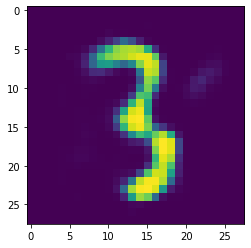

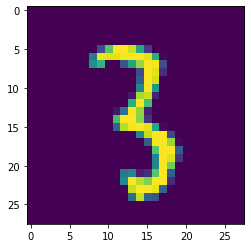

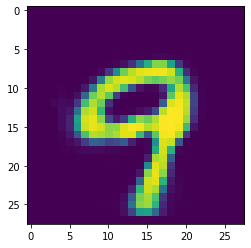

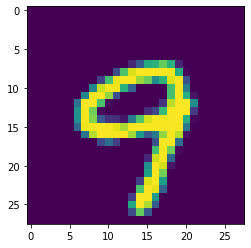

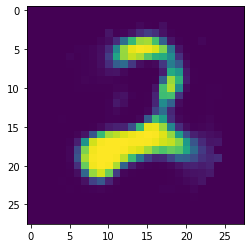

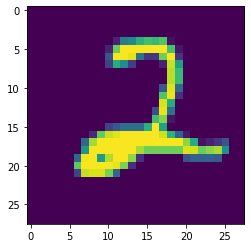

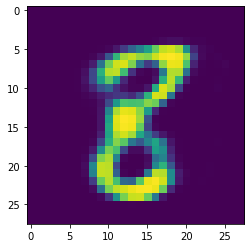

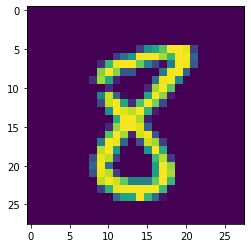

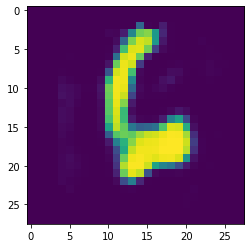

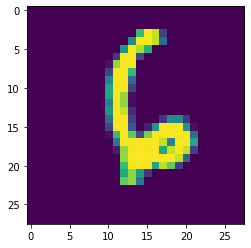

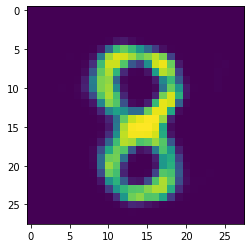

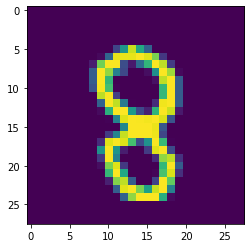

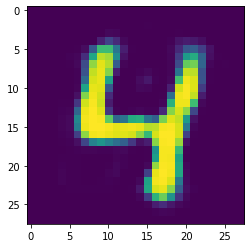

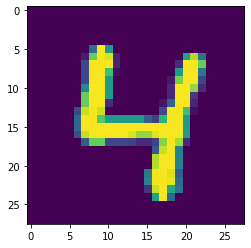

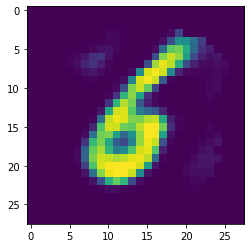

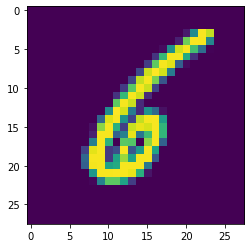

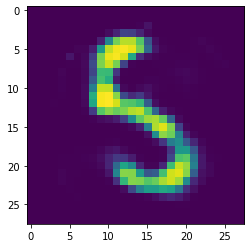

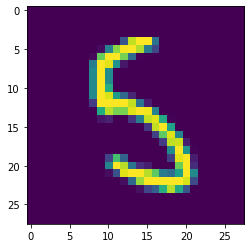

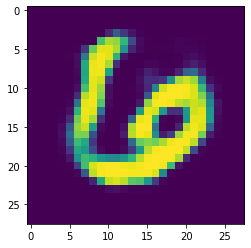

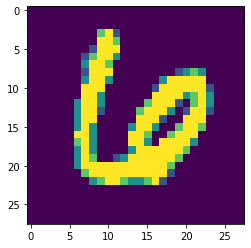

In [0]:
indexes = np.random.randint(low=1, high=1000,size=10)
for i in range(len(indexes)):
    output_test_image = session.run(output_layer,
                      feed_dict={x: [data.test.images[indexes[i]]]}) 
        # Reshape sample from 784 to 28x28
    reshaped_sample = np.reshape(output_test_image, newshape=(28,28)) 
    # Plot reshaped sample image using grayscale color map
    plt.figure()
    plt.imshow(reshaped_sample) 

    # Reshape sample from 784 to 28x28
    reshaped_sample = np.reshape(data.test.images[indexes[i]], newshape=(28,28)) 
    # Plot reshaped sample image using grayscale color map
    plt.figure()
    plt.imshow(reshaped_sample) 


In [0]:
session.close()

## References

[1] https://medium.com/@connectwithghosh/simple-autoencoder-example-using-tensorflow-in-python-on-the-fashion-mnist-dataset-eee63b8ed9f1

[2] https://gertjanvandenburg.com/blog/autoencoder/

[3] https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/autoencoder.py
